In [69]:
import os
import numpy as np
import random
from skimage import io
import imgaug.augmenters as iaa
import imgaug.augmenters.flip as flip
import cv2 as cv2
import cv2
import Augmentor
import keras.utils as image
import matplotlib.pyplot as plt
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [70]:
root = r'C:\Users\harsh\Desktop\Gray_scale'
for i in range(0,16):
    directory_path = os.path.join(root,f'signature_{i+1}')
    if not os.path.exists(directory_path):
        os.mkdir(directory_path)
    else:
        print(f"Directory '{directory_path} already exists")

Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_1 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_2 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_3 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_4 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_5 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_6 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_7 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_8 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_9 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_10 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_11 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_12 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_13 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_14 al

In [71]:
data_dir = r'C:\Users\harsh\Desktop\Handwritten Signature Data\Data'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i , directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
rename_folders(data_dir)

In [72]:
def load_and_augment_data(folder_path, num_augmentations=20):
    augmenter = iaa.Sequential([
        iaa.Affine(rotate=(-25, 25), scale=(0.8, 1.2)),
        flip.Fliplr(p=0.5)
    ])

    X = []
    y = []

    classes = os.listdir(folder_path)
    for i, cls in enumerate(classes):
        cls_path = os.path.join(folder_path, cls)
        images = os.listdir(cls_path)
        for img in images:
            img_path = os.path.join(cls_path, img)
            #load the image
            image = io.imread(img_path)
            #apply the augmentation and save the new images
            for j in range(num_augmentations):
                aug_image = augmenter.augment_image(image)
                X.append(aug_image)
                y.append(i)

    X = np.array(X)
    y = np.array(y)

    #Shuffle the data
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    return X, y

In [73]:
load_and_augment_data(data_dir)

(array([[[[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         ...,
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
   

In [74]:
# code for grayscale images

directory = r'C:\Users\harsh\Desktop\Handwritten Signature Data\Data'

gray_path = r'C:\Users\Harsh\Desktop\Gray_scale'

def gray(directory):
    for root, dirs, files, in os.walk(directory):
        for i, directory in enumerate(dirs):
            print(i+1, directory)
            old_dir = os.path.join(root, directory)

            old_gray = os.path.join(gray_path, f'signature_{i+1}')
            for j, file_name in enumerate((os.listdir(old_dir))):
                filename = f'signature_{j+1}.jpg'
                #print(filename)
                img = cv2.imread((os.path.join(old_dir, filename)))# image read for grayscale

                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                cv2.imwrite((os.path.join(old_gray, f'signature_{j+1}.jpg')),gray)
                
            
gray(directory)

1 subject_1
2 subject_10
3 subject_11
4 subject_12
5 subject_13
6 subject_14
7 subject_15
8 subject_16
9 subject_2
10 subject_3
11 subject_4
12 subject_5
13 subject_6
14 subject_7
15 subject_8
16 subject_9


In [75]:
p = Augmentor.Pipeline(gray_path)

Initialised with 159 image(s) found.
Output directory set to C:\Users\Harsh\Desktop\Gray_scale\output.

In [76]:
p.rotate(probability = 0.7,max_left_rotation=10,max_right_rotation=10)

p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)

p.rotate270(probability=0.5)

p.flip_left_right(probability=0.5)

p.flip_top_bottom(probability=0.5)

p.zoom_random(probability=0.5, percentage_area=0.8)

# p.zoom(probability=0.3,min_factor=1.1,max_factor=1.6)

p.skew_left_right(0.5,0.3)

p.skew_top_bottom(0.5,0.5)
p.resize(1,519,276)
p.random_distortion(0.5,4,6,5) #probability, grid width, height,magnitude
p.shear(1,10,11) # prob, max_shear_left, max_shear_right


In [77]:
p.sample(1600)

Processing <PIL.Image.Image image mode=L size=519x276 at 0x2B91D14EB50>: 100%|██████████| 1600/1600 [00:05<00:00, 289.71 Samples/s]


In [78]:
# To rename Augmented Data

data_dir = r'C:\Users\harsh\Desktop\Gray_scale\output'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))

None


In [79]:
input_folder = r"C:\Users\harsh\Desktop\Gray_scale\output"
splitfolders.ratio (input_folder, output=r"C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_75_25",
                seed=42, ratio=(.75,.25),
                group_prefix=None)

Copying files: 1600 files [00:05, 286.18 files/s]


(519, 276)


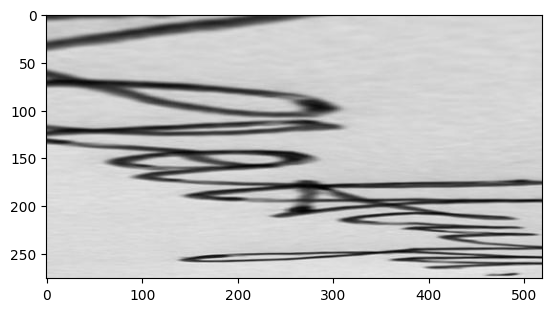

In [80]:
import keras.utils as image
import matplotlib.pyplot as plt
img = image.load_img(r'C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_75_25\train\subject_1\signature_11.jpg')
plt.imshow(img)
print(img.size)

In [81]:
print(cv2.imread(r'C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_75_25\train\subject_1\signature_11.jpg').shape)
cv2.imread(r'C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_75_25\train\subject_1\signature_11.jpg')

(276, 519, 3)


array([[[ 46,  46,  46],
        [ 46,  46,  46],
        [ 47,  47,  47],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [215, 215, 215]],

       [[ 49,  49,  49],
        [ 49,  49,  49],
        [ 49,  49,  49],
        ...,
        [215, 215, 215],
        [215, 215, 215],
        [215, 215, 215]],

       [[ 50,  50,  50],
        [ 50,  50,  50],
        [ 50,  50,  50],
        ...,
        [216, 216, 216],
        [216, 216, 216],
        [216, 216, 216]],

       ...,

       [[220, 220, 220],
        [220, 220, 220],
        [220, 220, 220],
        ...,
        [220, 220, 220],
        [220, 220, 220],
        [219, 219, 219]],

       [[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [220, 220, 220],
        [219, 219, 219],
        [219, 219, 219]],

       [[216, 216, 216],
        [216, 216, 216],
        [216, 216, 216],
        ...,
        [220, 220, 220],
        [219, 219, 219],
        [218, 218, 218]]

In [82]:
#RUN FROM HERE

batch_size=50 #20  #15

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)


In [83]:
train_generator=train_datagen.flow_from_directory('C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_75_25//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

# same generator for validation data

validation_generator=test_datagen.flow_from_directory("C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_75_25//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

Found 1507 images belonging to 16 classes.


Found 684 images belonging to 16 classes.


In [84]:
batch_size=50

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory('C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_75_25//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    class_mode='categorical'
)

# same generator for validation data
validation_generator=test_datagen.flow_from_directory("C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_75_25//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    class_mode='categorical'
)

num_samples = len(train_generator)
X_train = []
y_train = []
for i in range(num_samples):
    x_batch, y_batch = next(train_generator)
    X_train.append(x_batch)
    y_train.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

num_samples = len(validation_generator)
x_val = []
y_val = []
for i in range(num_samples):
    x_batch, y_batch = next(validation_generator)
    x_val.append(x_batch)
    y_val.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

Found 1507 images belonging to 16 classes.


Found 684 images belonging to 16 classes.


# 25 EPOCH

In [85]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 25
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/25
36/36 [==============================] - 6s 163ms/step - loss: 2.8729 - accuracy: 0.0531 - val_loss: 2.7943 - val_accuracy: 0.0629
Epoch 2/25
36/36 [==============================] - 6s 177ms/step - loss: 2.7837 - accuracy: 0.0730 - val_loss: 2.7790 - val_accuracy: 0.0775
Epoch 3/25
36/36 [==============================] - 9s 246ms/step - loss: 2.7709 - accuracy: 0.0803 - val_loss: 2.7623 - val_accuracy: 0.0658
Epoch 4/25
36/36 [==============================] - 9s 242ms/step - loss: 2.7625 - accuracy: 0.0803 - val_loss: 2.7762 - val_accuracy: 0.0731
Epoch 5/25
36/36 [==============================] - 9s 240ms/step - loss: 2.7530 - accuracy: 0.0916 - val_loss: 2.8009 - val_accuracy: 0.0658
Epoch 6/25
36/36 [==============================] - 9s 244ms/step - loss: 2.7508 - accuracy: 0.0989 - val_loss: 2.7694 - val_accuracy: 0.0702
Epoch 7/25
36/36 [==============================] - 9s 244ms/step - loss: 2.7379 - accuracy: 0.0909 - val_loss: 2.7857 - val_accuracy: 0.0716
Epoch 

In [86]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

22/22 [==============================] - 1s 66ms/step - loss: 2.7663 - accuracy: 0.1082
Test Loss: 2.7663416862487793
Test Accuracy: 0.10818713158369064
22/22 [==============================] - 2s 65ms/step


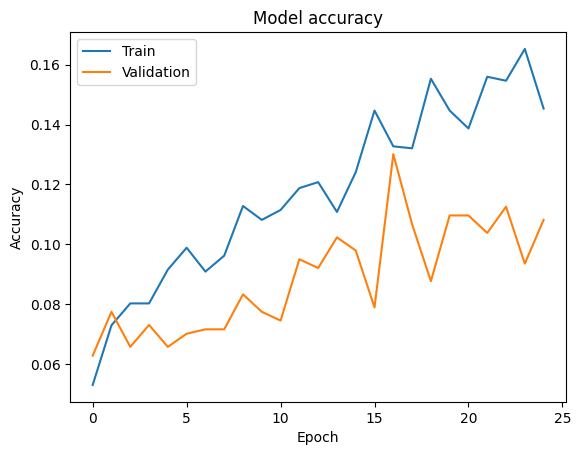

In [87]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


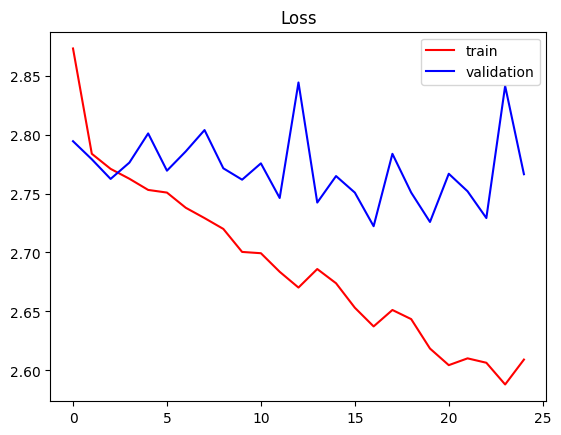

In [88]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

22/22 [==============================] - 1s 62ms/step


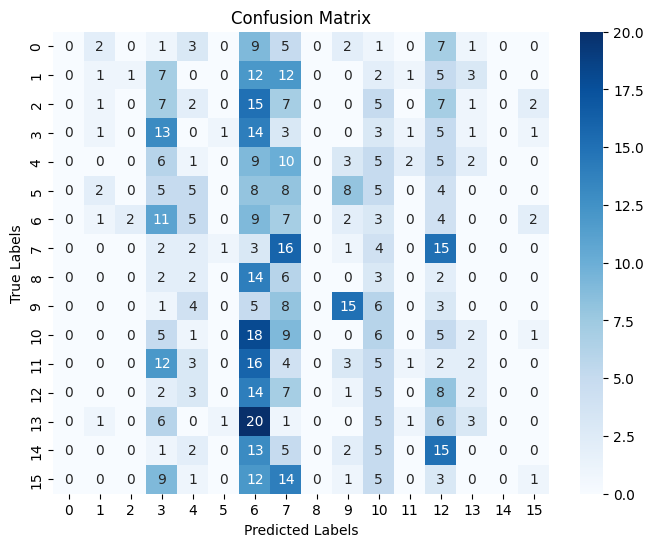

In [89]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [90]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.10585188185391149
Average False Positive Rate (FPR): 0.05961076213491533
Average True Negative Rate (TNR): 0.9403892378650847
Average False Negative Rate (FNR): 0.8941481181460884
Average Precision: 0.09472094671303494
Average Recall: 0.10585188185391149
Average F1-Score: 0.08102140282280673


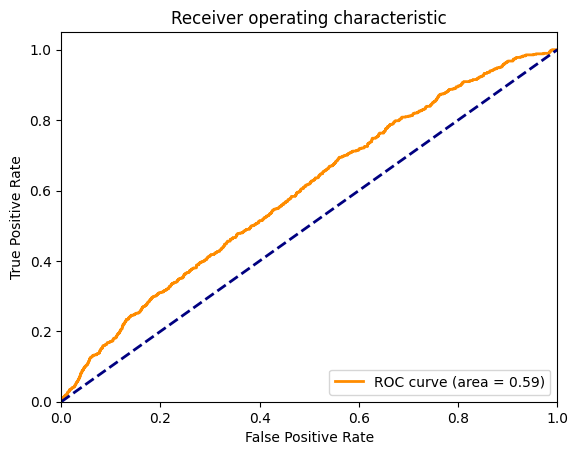

In [91]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 30 EPOCH

In [92]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 30
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/30
36/36 [==============================] - 8s 203ms/step - loss: 2.8754 - accuracy: 0.0617 - val_loss: 2.8047 - val_accuracy: 0.0614
Epoch 2/30
36/36 [==============================] - 6s 171ms/step - loss: 2.7926 - accuracy: 0.0610 - val_loss: 2.7651 - val_accuracy: 0.0819
Epoch 3/30
36/36 [==============================] - 6s 173ms/step - loss: 2.7690 - accuracy: 0.0810 - val_loss: 2.7744 - val_accuracy: 0.0819
Epoch 4/30
36/36 [==============================] - 6s 175ms/step - loss: 2.7580 - accuracy: 0.0929 - val_loss: 2.7576 - val_accuracy: 0.1009
Epoch 5/30
36/36 [==============================] - 6s 172ms/step - loss: 2.7561 - accuracy: 0.1022 - val_loss: 2.7544 - val_accuracy: 0.0906
Epoch 6/30
36/36 [==============================] - 6s 171ms/step - loss: 2.7275 - accuracy: 0.1042 - val_loss: 2.7389 - val_accuracy: 0.0936
Epoch 7/30
36/36 [==============================] - 6s 172ms/step - loss: 2.7141 - accuracy: 0.1029 - val_loss: 2.7403 - val_accuracy: 0.0789
Epoch 

In [93]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

22/22 [==============================] - 1s 52ms/step - loss: 2.7389 - accuracy: 0.1272
Test Loss: 2.7388999462127686
Test Accuracy: 0.12719298899173737
22/22 [==============================] - 1s 50ms/step


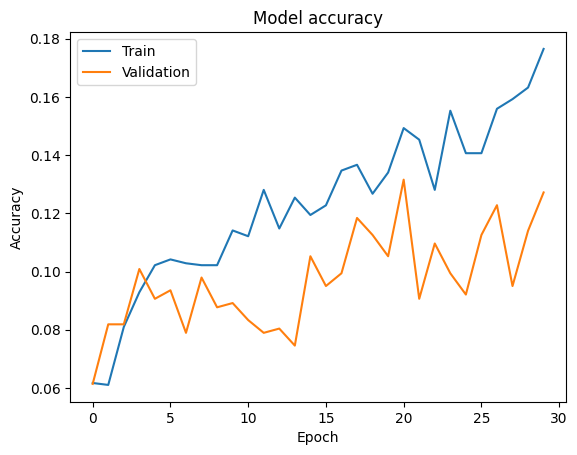

In [94]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


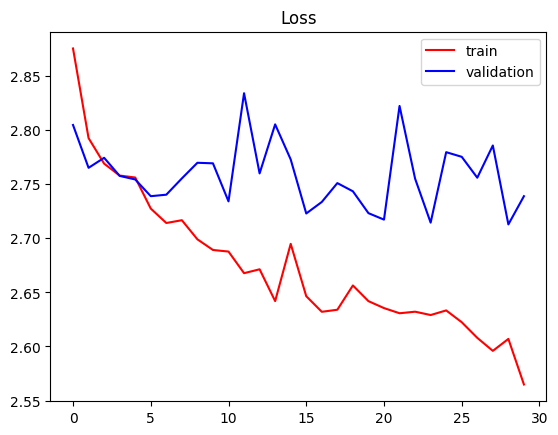

In [95]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

22/22 [==============================] - 1s 49ms/step


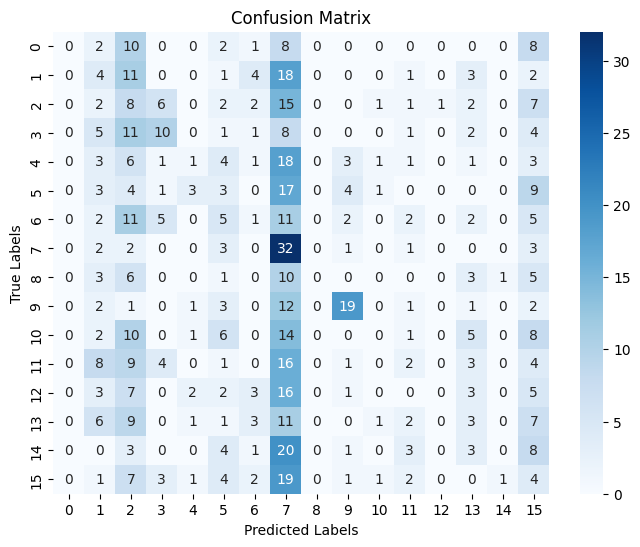

In [96]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [97]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.12386251835610337
Average False Positive Rate (FPR): 0.05838894710862058
Average True Negative Rate (TNR): 0.9416110528913795
Average False Negative Rate (FNR): 0.8761374816438966
Average Precision: 0.10440656736249285
Average Recall: 0.12386251835610337
Average F1-Score: 0.09541537066210595


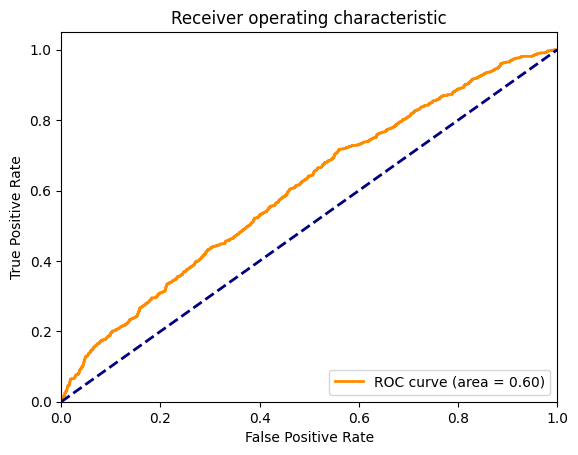

In [98]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 35 EPOCH

In [99]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 35
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/35
36/36 [==============================] - 9s 217ms/step - loss: 2.8666 - accuracy: 0.0670 - val_loss: 2.7858 - val_accuracy: 0.0556
Epoch 2/35
36/36 [==============================] - 8s 211ms/step - loss: 2.7783 - accuracy: 0.0816 - val_loss: 2.8178 - val_accuracy: 0.0629
Epoch 3/35
36/36 [==============================] - 7s 208ms/step - loss: 2.7777 - accuracy: 0.0790 - val_loss: 2.7790 - val_accuracy: 0.0819
Epoch 4/35
36/36 [==============================] - 7s 206ms/step - loss: 2.7680 - accuracy: 0.0896 - val_loss: 2.7621 - val_accuracy: 0.0965
Epoch 5/35
36/36 [==============================] - 7s 209ms/step - loss: 2.7671 - accuracy: 0.0902 - val_loss: 2.7853 - val_accuracy: 0.0789
Epoch 6/35
36/36 [==============================] - 7s 206ms/step - loss: 2.7346 - accuracy: 0.1055 - val_loss: 2.7552 - val_accuracy: 0.0789
Epoch 7/35
36/36 [==============================] - 7s 206ms/step - loss: 2.7191 - accuracy: 0.1128 - val_loss: 2.7607 - val_accuracy: 0.0921
Epoch 

In [100]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

22/22 [==============================] - 1s 59ms/step - loss: 2.7933 - accuracy: 0.1272
Test Loss: 2.7932798862457275
Test Accuracy: 0.12719298899173737
22/22 [==============================] - 1s 59ms/step


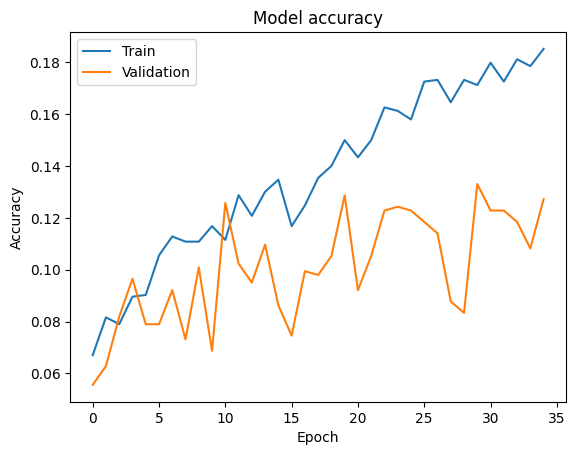

In [101]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


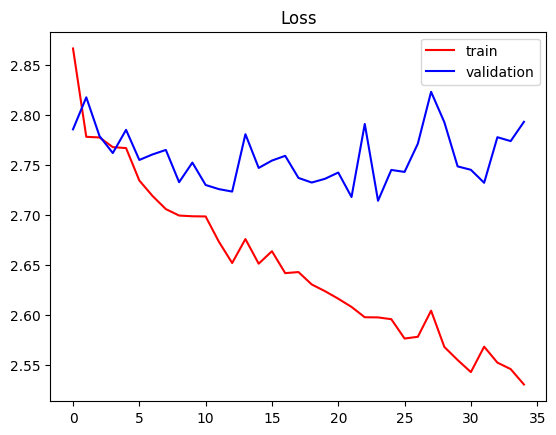

In [102]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

22/22 [==============================] - 1s 57ms/step


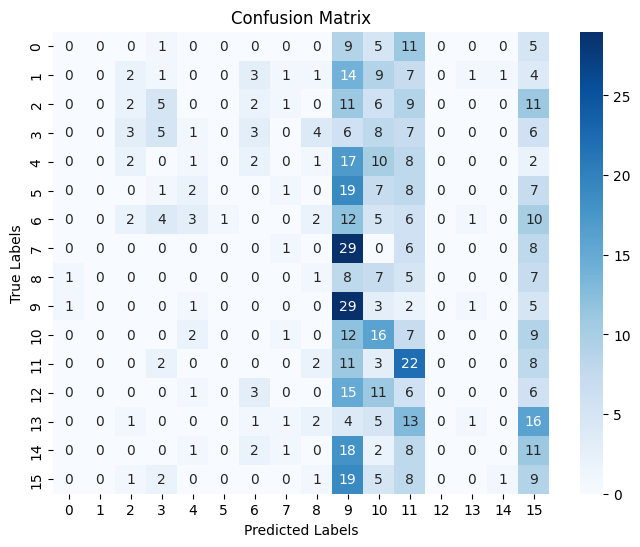

In [103]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [104]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.12168203805768674
Average False Positive Rate (FPR): 0.05835438314068208
Average True Negative Rate (TNR): 0.9416456168593179
Average False Negative Rate (FNR): 0.8783179619423133
Average Precision: 0.09118005518547877
Average Recall: 0.12168203805768674
Average F1-Score: 0.07258279694073738


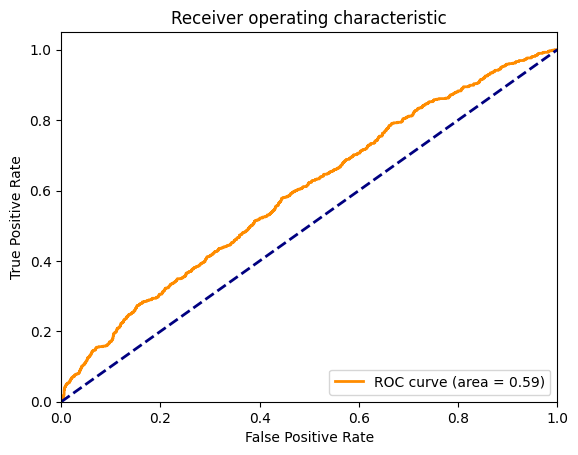

In [105]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 40 EPOCH

In [106]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 40
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/40
36/36 [==============================] - 5s 112ms/step - loss: 2.8719 - accuracy: 0.0756 - val_loss: 2.8196 - val_accuracy: 0.0658
Epoch 2/40
36/36 [==============================] - 4s 106ms/step - loss: 2.7821 - accuracy: 0.0610 - val_loss: 2.7675 - val_accuracy: 0.0716
Epoch 3/40
36/36 [==============================] - 4s 105ms/step - loss: 2.7735 - accuracy: 0.0803 - val_loss: 2.7841 - val_accuracy: 0.0716
Epoch 4/40
36/36 [==============================] - 4s 105ms/step - loss: 2.7612 - accuracy: 0.0856 - val_loss: 2.7654 - val_accuracy: 0.0819
Epoch 5/40
36/36 [==============================] - 4s 105ms/step - loss: 2.7410 - accuracy: 0.0896 - val_loss: 2.7554 - val_accuracy: 0.0716
Epoch 6/40
36/36 [==============================] - 4s 105ms/step - loss: 2.7295 - accuracy: 0.0989 - val_loss: 2.7977 - val_accuracy: 0.0687
Epoch 7/40
36/36 [==============================] - 4s 105ms/step - loss: 2.7348 - accuracy: 0.1042 - val_loss: 2.7571 - val_accuracy: 0.0775
Epoch 

In [107]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

22/22 [==============================] - 1s 40ms/step - loss: 2.7949 - accuracy: 0.1170
Test Loss: 2.7948925495147705
Test Accuracy: 0.11695906519889832
22/22 [==============================] - 1s 39ms/step


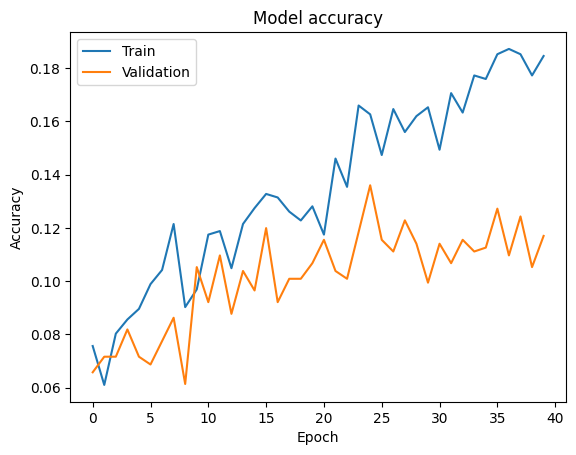

In [108]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


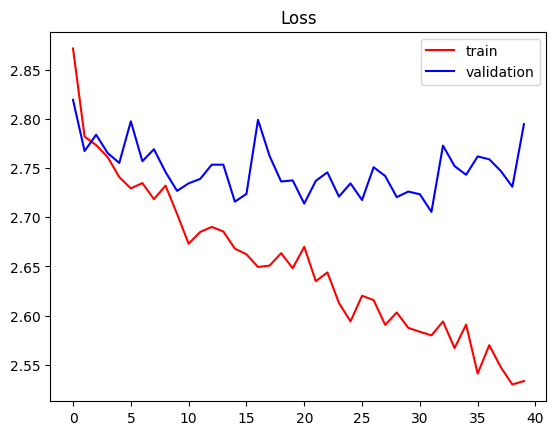

In [109]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

22/22 [==============================] - 1s 38ms/step


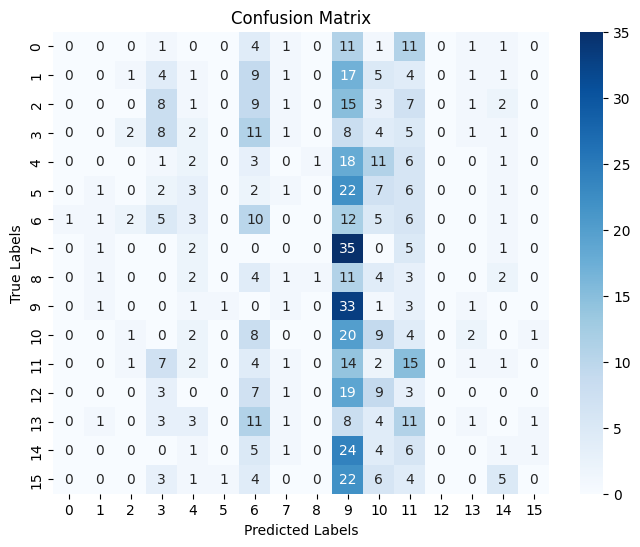

In [110]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [111]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.11375743353753587
Average False Positive Rate (FPR): 0.05900161642422287
Average True Negative Rate (TNR): 0.9409983835757771
Average False Negative Rate (FNR): 0.8862425664624642
Average Precision: 0.08855997712399097
Average Recall: 0.11375743353753587
Average F1-Score: 0.06698949048487005


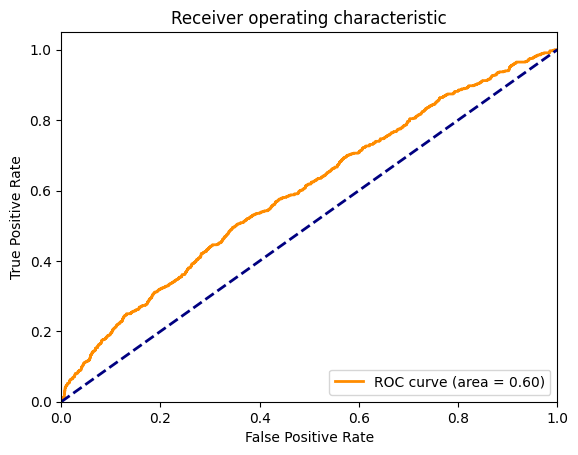

In [112]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 45 EPOCH

In [113]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 45
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/45
36/36 [==============================] - 4s 106ms/step - loss: 2.8733 - accuracy: 0.0717 - val_loss: 2.8230 - val_accuracy: 0.0570
Epoch 2/45
36/36 [==============================] - 4s 101ms/step - loss: 2.7896 - accuracy: 0.0657 - val_loss: 2.7566 - val_accuracy: 0.0848
Epoch 3/45
36/36 [==============================] - 4s 99ms/step - loss: 2.7654 - accuracy: 0.0922 - val_loss: 2.7902 - val_accuracy: 0.0643
Epoch 4/45
36/36 [==============================] - 4s 100ms/step - loss: 2.7678 - accuracy: 0.0836 - val_loss: 2.7848 - val_accuracy: 0.0936
Epoch 5/45
36/36 [==============================] - 4s 100ms/step - loss: 2.7642 - accuracy: 0.0810 - val_loss: 2.7773 - val_accuracy: 0.0716
Epoch 6/45
36/36 [==============================] - 4s 100ms/step - loss: 2.7419 - accuracy: 0.0962 - val_loss: 2.7440 - val_accuracy: 0.0789
Epoch 7/45
36/36 [==============================] - 4s 99ms/step - loss: 2.7309 - accuracy: 0.0995 - val_loss: 2.7612 - val_accuracy: 0.0687
Epoch 8/

In [114]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

22/22 [==============================] - 1s 32ms/step - loss: 2.7869 - accuracy: 0.1184
Test Loss: 2.7869365215301514
Test Accuracy: 0.1184210553765297
22/22 [==============================] - 1s 31ms/step


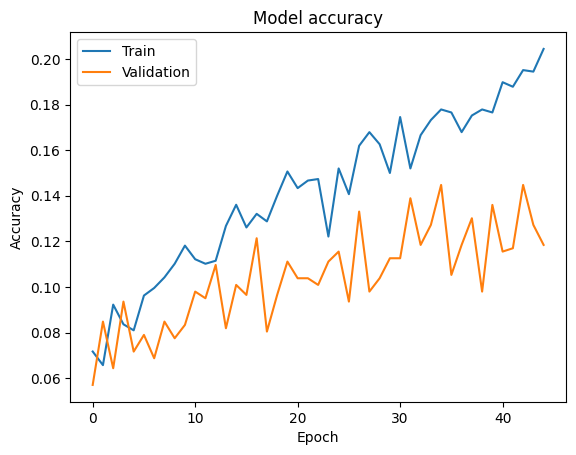

In [115]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


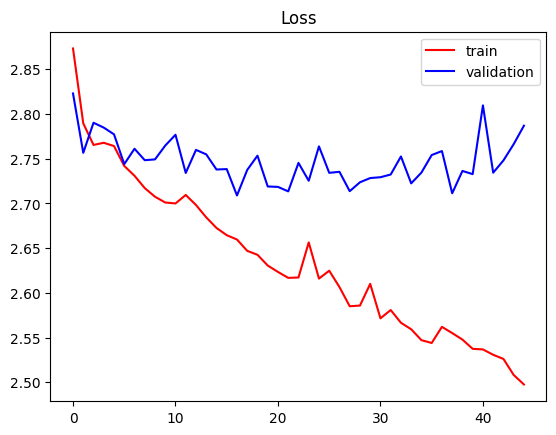

In [116]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

22/22 [==============================] - 1s 31ms/step


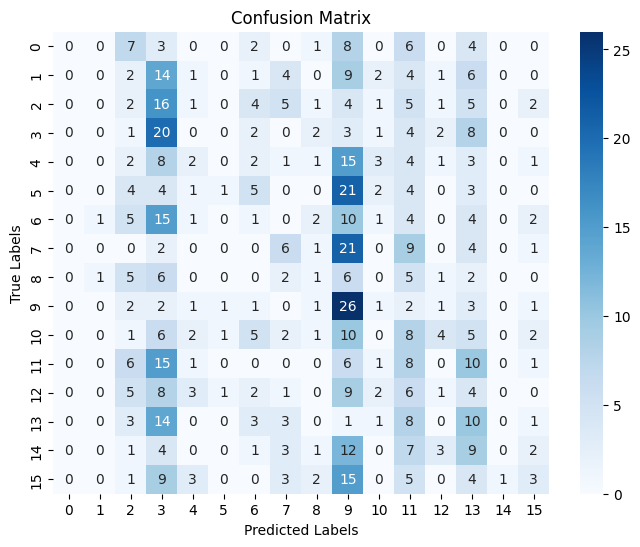

In [117]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [118]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.11693767338802008
Average False Positive Rate (FPR): 0.058876625767851014
Average True Negative Rate (TNR): 0.941123374232149
Average False Negative Rate (FNR): 0.8830623266119799
Average Precision: 0.09195500136246765
Average Recall: 0.11693767338802008
Average F1-Score: 0.07759869629198385


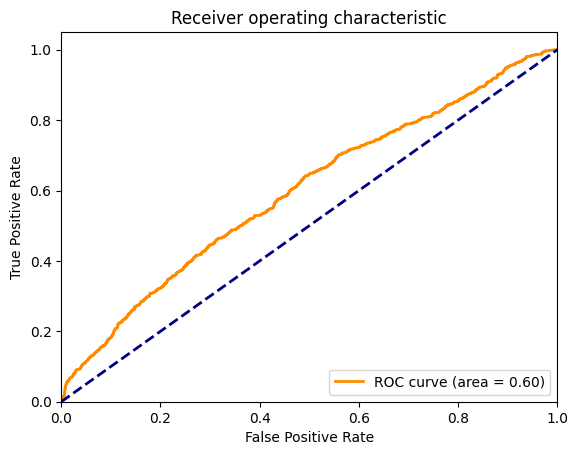

In [119]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 80 EPOCH

In [120]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 80
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/80
36/36 [==============================] - 4s 103ms/step - loss: 2.8652 - accuracy: 0.0630 - val_loss: 2.8162 - val_accuracy: 0.0643
Epoch 2/80
36/36 [==============================] - 4s 99ms/step - loss: 2.7803 - accuracy: 0.0783 - val_loss: 2.7823 - val_accuracy: 0.0819
Epoch 3/80
36/36 [==============================] - 4s 101ms/step - loss: 2.7622 - accuracy: 0.0956 - val_loss: 2.7750 - val_accuracy: 0.0702
Epoch 4/80
36/36 [==============================] - 4s 104ms/step - loss: 2.7559 - accuracy: 0.0909 - val_loss: 2.7608 - val_accuracy: 0.0863
Epoch 5/80
36/36 [==============================] - 4s 104ms/step - loss: 2.7500 - accuracy: 0.0949 - val_loss: 2.7612 - val_accuracy: 0.0760
Epoch 6/80
36/36 [==============================] - 4s 104ms/step - loss: 2.7346 - accuracy: 0.1055 - val_loss: 2.7459 - val_accuracy: 0.0819
Epoch 7/80
36/36 [==============================] - 4s 104ms/step - loss: 2.7270 - accuracy: 0.1022 - val_loss: 2.7507 - val_accuracy: 0.0819
Epoch 8

In [121]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

22/22 [==============================] - 1s 34ms/step - loss: 2.9056 - accuracy: 0.1228
Test Loss: 2.9055747985839844
Test Accuracy: 0.12280701845884323
22/22 [==============================] - 1s 34ms/step


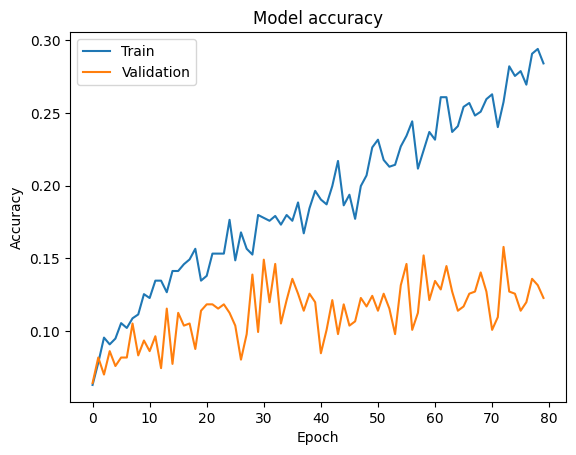

In [122]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


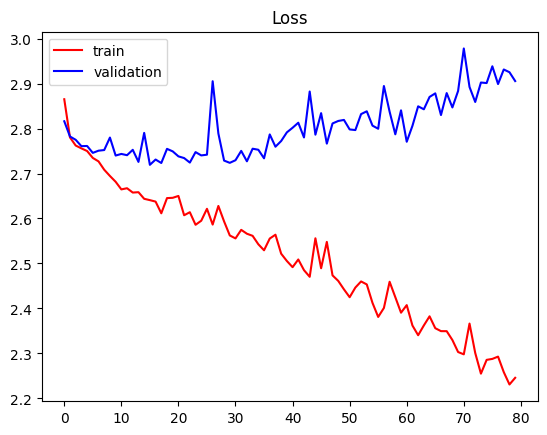

In [123]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

22/22 [==============================] - 1s 34ms/step


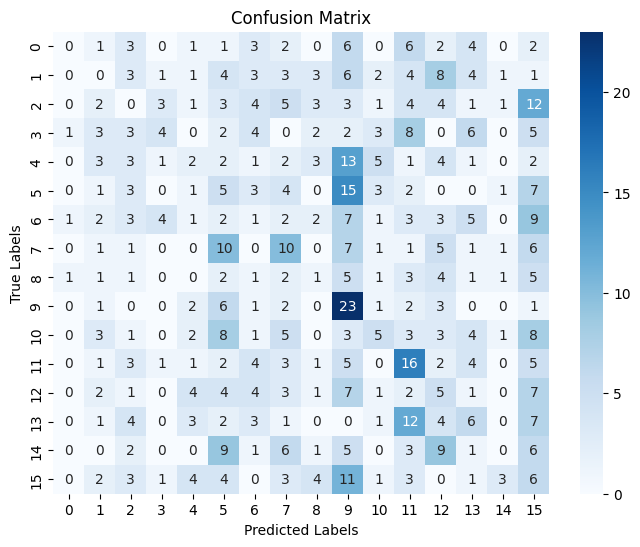

In [124]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [125]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.11920762555349856
Average False Positive Rate (FPR): 0.05859766449617602
Average True Negative Rate (TNR): 0.941402335503824
Average False Negative Rate (FNR): 0.8807923744465014
Average Precision: 0.10051208094567975
Average Recall: 0.11920762555349856
Average F1-Score: 0.09890929447181246


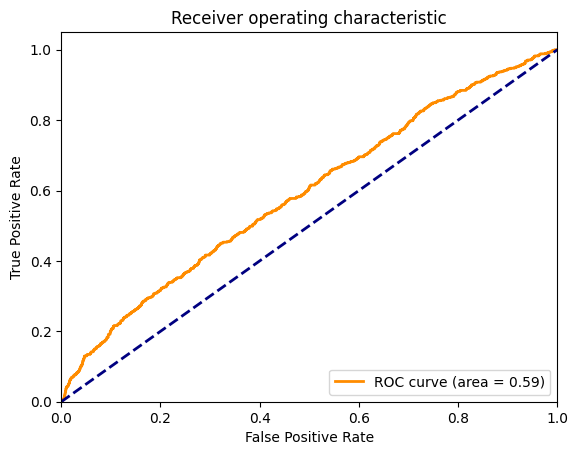

In [126]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 200 EPOCH

In [127]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 200
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/200
36/36 [==============================] - 9s 224ms/step - loss: 2.8642 - accuracy: 0.0796 - val_loss: 2.7856 - val_accuracy: 0.0702
Epoch 2/200
36/36 [==============================] - 11s 301ms/step - loss: 2.7816 - accuracy: 0.0803 - val_loss: 2.7657 - val_accuracy: 0.0687
Epoch 3/200
36/36 [==============================] - 11s 301ms/step - loss: 2.7759 - accuracy: 0.0909 - val_loss: 2.7928 - val_accuracy: 0.0950
Epoch 4/200
36/36 [==============================] - 11s 300ms/step - loss: 2.7667 - accuracy: 0.0790 - val_loss: 2.7621 - val_accuracy: 0.0833
Epoch 5/200
36/36 [==============================] - 11s 300ms/step - loss: 2.7573 - accuracy: 0.0770 - val_loss: 2.7518 - val_accuracy: 0.0921
Epoch 6/200
36/36 [==============================] - 11s 300ms/step - loss: 2.7472 - accuracy: 0.1042 - val_loss: 2.7571 - val_accuracy: 0.1023
Epoch 7/200
36/36 [==============================] - 11s 305ms/step - loss: 2.7368 - accuracy: 0.0929 - val_loss: 2.7738 - val_accuracy: 

In [128]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

22/22 [==============================] - 2s 80ms/step - loss: 3.0799 - accuracy: 0.0716
Test Loss: 3.0798683166503906
Test Accuracy: 0.07163742929697037
22/22 [==============================] - 2s 81ms/step


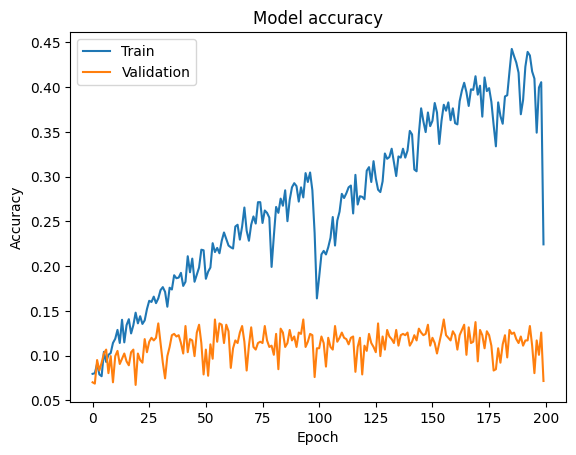

In [129]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


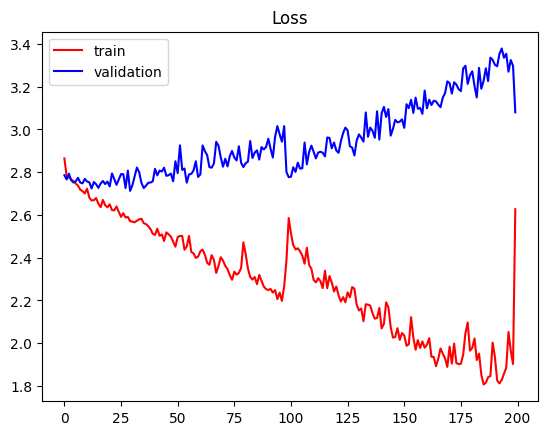

In [130]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

22/22 [==============================] - 2s 81ms/step


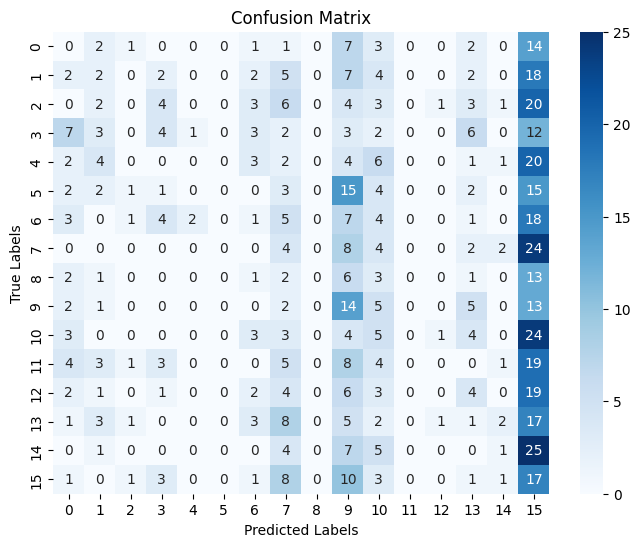

In [131]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [132]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.06914941492132347
Average False Positive Rate (FPR): 0.062033144383364866
Average True Negative Rate (TNR): 0.9379668556166352
Average False Negative Rate (FNR): 0.9308505850786766
Average Precision: 0.04822370149476128
Average Recall: 0.06914941492132347
Average F1-Score: 0.04509273832520731


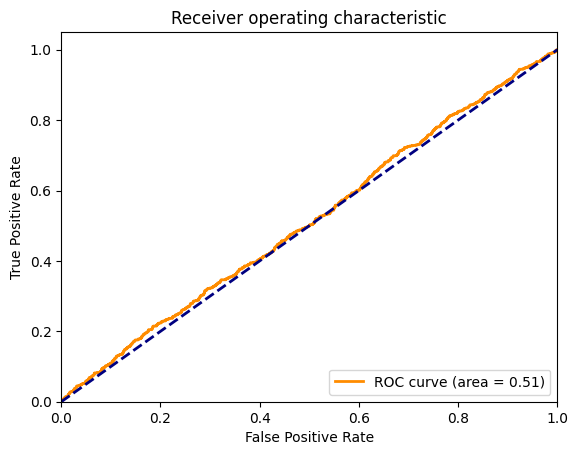

In [133]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()